### Traitement des données

In [14]:
#importation des modules
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

c:\Users\pc gold\Documents\GitHub\code\weekcode\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
def get_data():
    from sklearn.impute import SimpleImputer
    cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
    df = cervical_cancer_risk_factors.data.features 
    df = df.dropna(thresh=len(df)*0.5, axis=1)
    # Remplacer les valeurs manquantes restantes par des médianes pour les colonnes numériques
    imputer = SimpleImputer(strategy="median")
    df.iloc[:, :] = imputer.fit_transform(df)
    return df
    # Afficher la mémoire utilisée avant l'optimisation
    return("📊 Utilisation mémoire avant optimisation :")
    return(df.memory_usage(deep=True).sum(), "octets")

In [23]:
# Afficher la mémoire utilisée avant l'optimisation
print("📊 Utilisation mémoire avant optimisation :")
print(df.memory_usage(deep=True).sum(), "octets")

📊 Utilisation mémoire avant optimisation :
79068 octets


In [16]:
def optimize_memory(df):
    
    for col in df.columns:  # Parcours toutes les colonnes du DataFrame
        col_type = df[col].dtype  # Récupère le type de la colonne
        
        # Optimisation des entiers (int64 → int32 ou plus petit)
        if col_type == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')  
        
        # Optimisation des flottants (float64 → float32)
        elif col_type == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')  

    return df  # Retourne le DataFrame optimisé

In [22]:
# Appliquer l'optimisation mémoire
df = optimize_memory(df)

# Afficher la mémoire utilisée après l'optimisation
print("\n📊 Utilisation mémoire après optimisation :")
print(df.memory_usage(deep=True).sum(), "octets")


📊 Utilisation mémoire après optimisation :
79068 octets


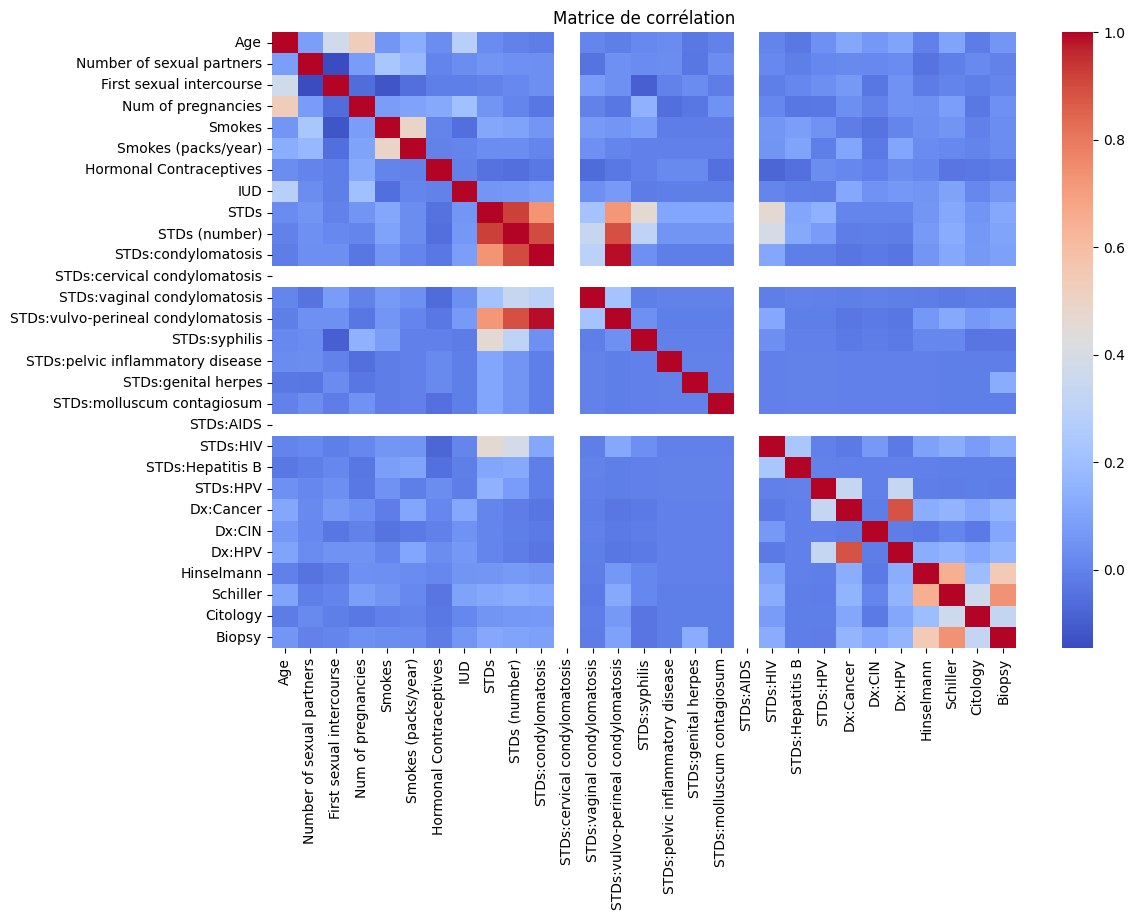

In [21]:
#Vérifier les corrélations et supprimer les colonnes redondantes
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [18]:
# après analyse de la matrice de corrélations 
def get_data_origninal():
    df=get_data()
    cols_to_drop = ["Smokes (years)", "Hormonal Contraceptives (years)", "IUD (years)", "STDs: Number of diagnosis", "Dx"]
    df= df.drop(columns=[col for col in cols_to_drop if col in df.columns])
    return df

In [19]:
df=get_data_origninal()
print(df.shape)

(858, 29)


In [19]:
df.head()
# visualiser les colonnes

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (packs/year),Hormonal Contraceptives,IUD,STDs,STDs (number),...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [20]:
df.describe()
# pour avoir des statistiques

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (packs/year),Hormonal Contraceptives,IUD,STDs,STDs (number),...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,0.446278,0.686480,0.096737,0.092075,0.155012,...,0.020979,0.001166,0.002331,0.020979,0.010490,0.020979,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.350641,2.210351,0.464194,0.295771,0.289300,0.529617,...,0.143398,0.034139,0.048252,0.143398,0.101939,0.143398,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df.isnull()
# pour avoir les colonnes manquantes

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (packs/year),Hormonal Contraceptives,IUD,STDs,STDs (number),...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
#affin de visualiser le déséquilibre et ensuite équilibrer les données
df["Biopsy"].value_counts()

Biopsy
0    803
1     55
Name: count, dtype: int64

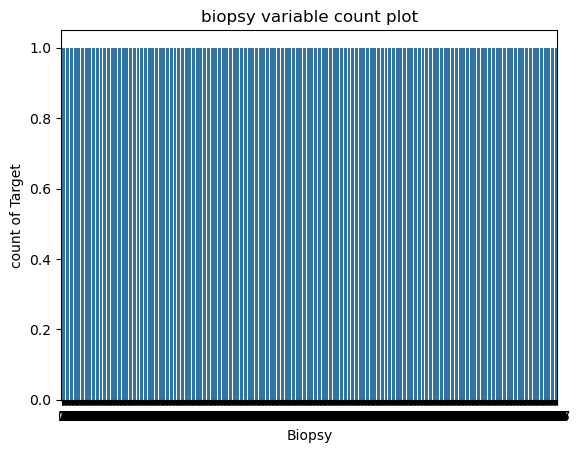

In [57]:
sns.countplot(df["Biopsy"])
plt.xlabel ("Biopsy")
plt.ylabel("count of Target")
plt.title("biopsy variable count plot")
plt.show()

### Random Forest Classifier

In [58]:
# Séparation des features et du target
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [59]:
X.shape

(858, 28)

In [60]:
y


0      0
1      0
2      0
3      0
4      0
      ..
853    0
854    0
855    0
856    0
857    0
Name: Biopsy, Length: 858, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(criterion= "gini",
                            max_depth= 8,
                            min_samples_split=10,
                            random_state=5)

In [71]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [72]:
clf.feature_importances_

array([6.14172178e-02, 2.19468543e-02, 5.62586825e-02, 2.67664745e-02,
       3.63075472e-03, 1.94079736e-02, 5.32843227e-03, 5.78634520e-03,
       4.56430141e-03, 1.30453138e-02, 4.75732050e-03, 0.00000000e+00,
       7.54505599e-05, 4.77156948e-03, 2.15619723e-03, 0.00000000e+00,
       2.13729014e-02, 0.00000000e+00, 0.00000000e+00, 7.21735960e-03,
       0.00000000e+00, 0.00000000e+00, 9.70109999e-03, 3.50718424e-02,
       5.88758663e-03, 2.04253292e-01, 4.01459350e-01, 8.51236803e-02])

In [73]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN',
       'Dx:HPV', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

In [74]:
y_pred= clf.predict(X_test)

In [75]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[150,   5],
       [  5,  12]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9418604651162791

In [78]:
from sklearn.metrics import classification_report
print( classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       155
           1       0.71      0.71      0.71        17

    accuracy                           0.94       172
   macro avg       0.84      0.84      0.84       172
weighted avg       0.94      0.94      0.94       172



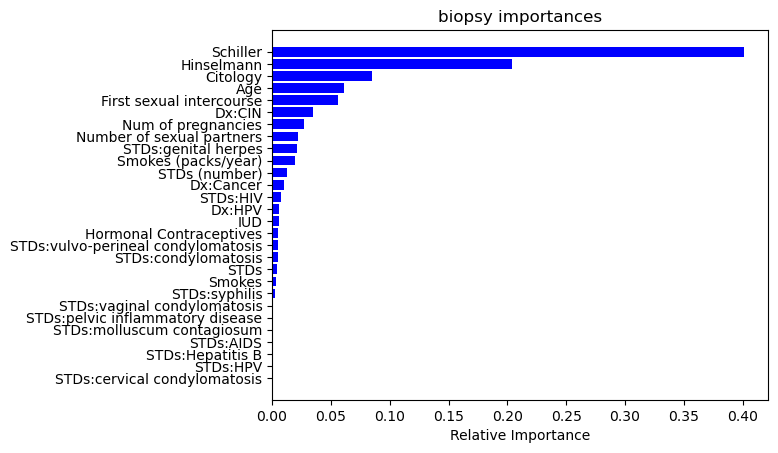

In [79]:
features= df.columns
importances=clf.feature_importances_
indices=np.argsort (importances)

plt.title('biopsy importances')
plt.barh(range(len(indices)), importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [80]:
explainer= shap.Explainer(clf, X_train)
shap_values=explainer( X_test)

<Figure size 640x480 with 0 Axes>

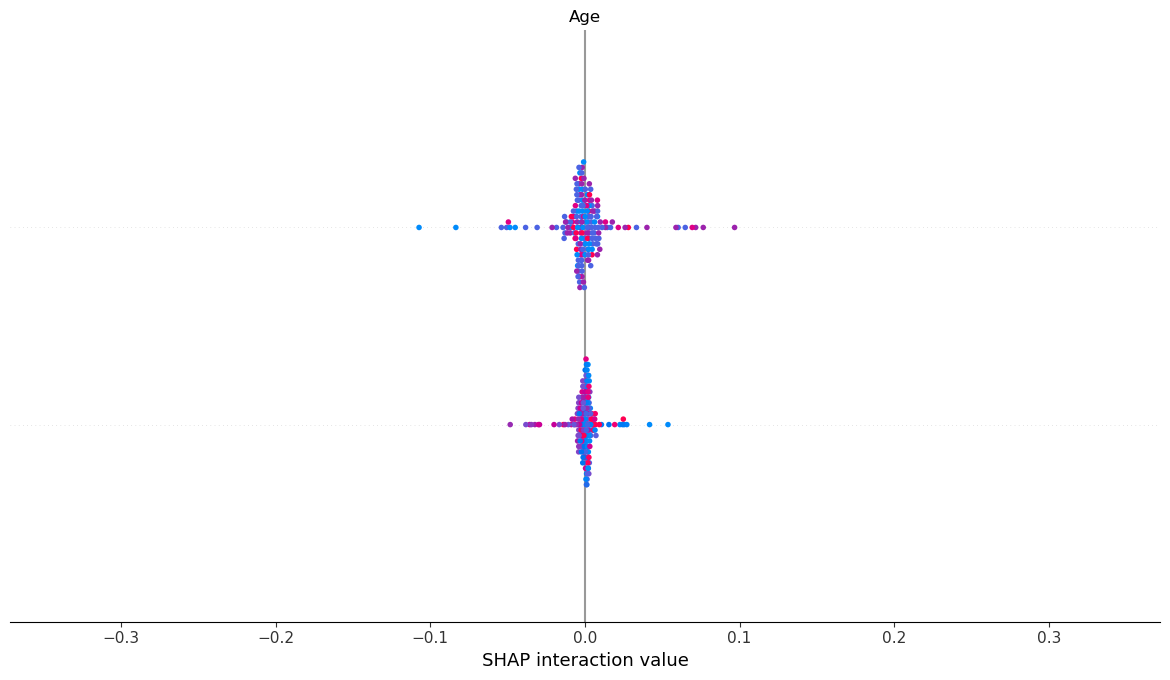

In [82]:
shap.summary_plot(shap_values, X_test, feature_names= df.columns)

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Entraîner un modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:


# Prédire les probabilités pour la classe positive
y_scores = model.predict_proba(X_test)[:, 1]

# Calculer l'AUC-ROC
roc_auc = roc_auc_score(y_test, y_scores)
print(f"AUC-ROC: {roc_auc:.4f}")

AUC-ROC: 0.9725


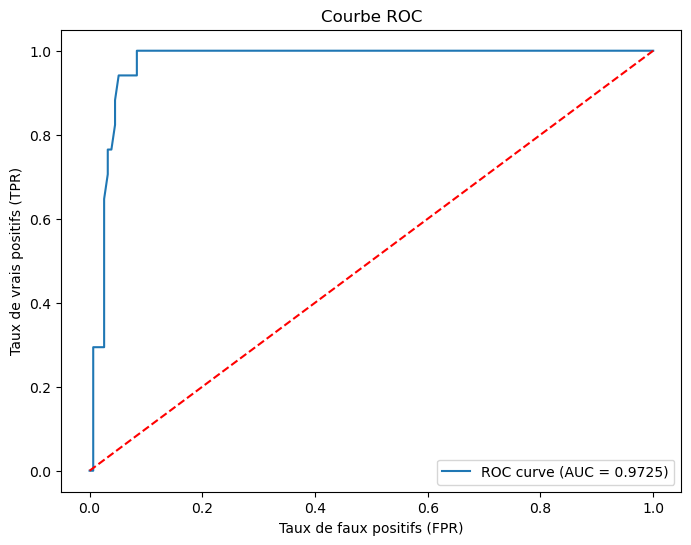

In [85]:
# Calculer la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--')  # Ligne de référence
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()